In [15]:
import numpy as np
import librosa
import soundfile as sf

In [19]:
def omega_h(h,f0,fs):
  return np.pi*2*(h+1)*f0/fs

In [16]:
def freq_from_fft(sig, fs):
    windowed = sig * np.hamming(len(sig))
    f = np.fft.rfft(windowed)
    i = np.argmax(abs(f)) 
    return fs * i / len(windowed)

In [18]:
def omega_k(k,N):
  return 2*np.pi*k/N

In [21]:
def nearest_harmonic(H,k,N,fs,f0):
  omega_h_arr = np.zeros(H)
  for i in range(H):
    omega_h_arr[i] = omega_h(i,f0,fs)
  return np.min(omega_h_arr-omega_k(k,N))

In [22]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [24]:
%cd 'drive/MyDrive'

/content/drive/MyDrive


In [70]:
d,fs== sf.read('clnsp1.wav')
d = d[:fs]
init_phase = np.zeros(N)
f = d[:N]*window
init = np.fft.fft(f)

In [81]:
data, fs = sf.read('clnsp1.wav')
data = data[:fs]
noise = np.random.normal(0, 0.03, len(data))
data = data + noise
sf.write('noisy.wav', data, fs)

N = int(0.02*fs)
L = int(0.01*fs)

f0 = librosa.yin(data, 65, 2500, fs, N, None, L)
window = np.hamming(N)
num_frames = int((len(data)-N+L)/L)
Y_k_l = np.zeros((N,num_frames),dtype=complex)
Y_b_k_l = np.zeros((N,num_frames),dtype=complex)
fi_k_l = np.zeros((N,num_frames))
H = 5
Y_r = np.zeros((N,num_frames),dtype=complex)
recon = np.zeros(len(data))
for i in range(num_frames):
  frame = data[i*L:i*L+N]*window
  Y_k_l[:,i] = np.fft.fft(frame)
  for k in range(N):
    Y_b_k_l[k,i] = Y_k_l[k,i]*np.exp(-1j*(2*np.pi*k/N)*i*L)
  if i == 0:
    fi_k_l[:,0] = np.angle(init)
  else:
    for j in range(N):
      fi_k_l[j,i] = fi_k_l[j,i-1] + (nearest_harmonic(H,j,N,fs,f0[i]) - omega_k(j,N))*L
      Y_r[j,i] = np.abs(Y_b_k_l[j,i])*np.exp(1j*fi_k_l[j,i])*np.exp(1j*(2*np.pi*j/N)*i*L)
    recon[i*L : i*L+N] = recon[i*L : i*L+N] + np.fft.ifft(Y_r[:,i])

      
sf.write('recon.wav', recon, fs)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part


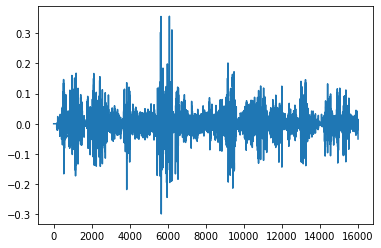

In [82]:
plt.plot(recon)

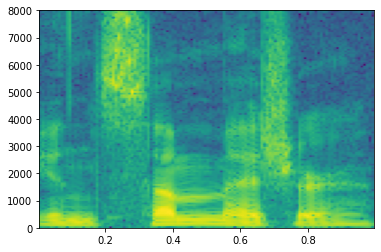

In [60]:
plt.specgram(d,Fs=fs);

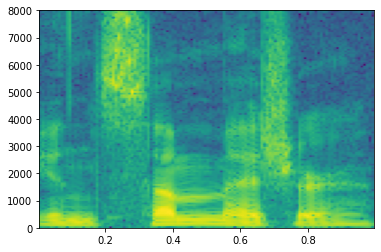

In [61]:
plt.specgram(data,Fs=fs);

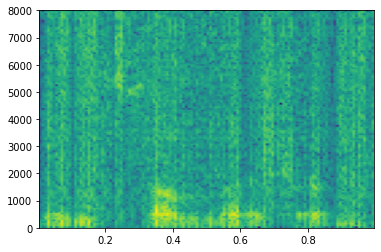

In [83]:
plt.specgram(recon,Fs=fs);